# 04 - k-Nearest Neighbors

![](images/portada_nb_FAV.png)

## Módulo 6 - Aprendizaje de máquina supervisado
### Profesor: M.Sc. Favio Vázquez


KNN es uno de los algoritmos de ML más simples. La idea detrás de este algoritmo es encontrar los puntos más cercanos a un valor ("sus vecinos más cercanos") para poder encontrar cual sería el valor de este punto o a qué clase pertenece.

Puede utiliarse para inputarse los valores nulos

In [1]:
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
import numpy

In [2]:
from imports import *

## KNN para regresión

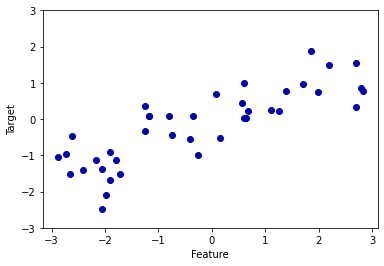

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y, "o")
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

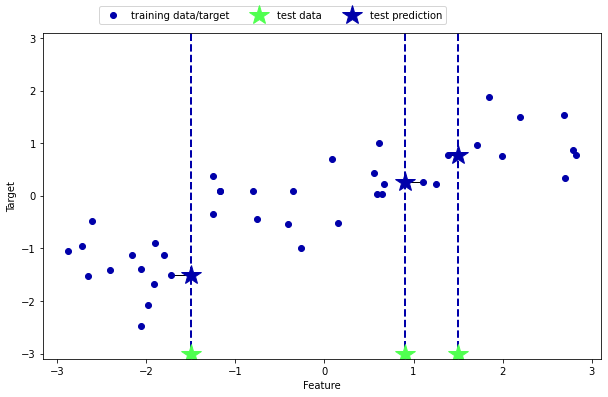

In [4]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

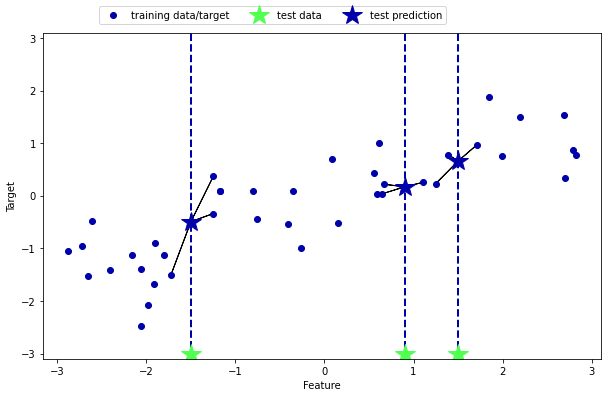

In [5]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

## Ejemplo

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X,y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [7]:
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [8]:
y_test

array([ 0.373,  0.218,  0.967, -1.388, -1.06 , -0.905,  0.437,  0.779,
       -0.541, -0.957])

In [9]:
reg.predict(X_test)

array([-0.054,  0.357,  1.137, -1.894, -1.139, -1.631,  0.357,  0.912,
       -0.447, -1.139])

In [10]:
reg.score(X_test,y_test) # r^2

0.8344172446249605

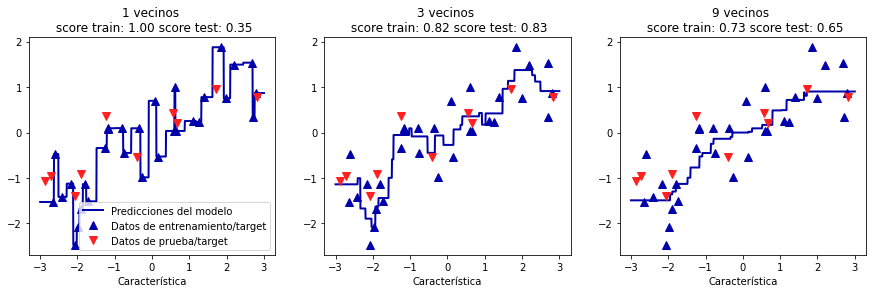

In [13]:
fig, axes = plt.subplots(1,3, figsize=(15,4))

line = np.linspace(-3,3,1000).reshape(-1,1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, "^", c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, "v", c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} vecinos \n score train: {:.2f} score test: {:.2f}".format(
    n_neighbors, reg.score(X_train,y_train), reg.score(X_test,y_test)))
    ax.set_xlabel("Característica")
    ax.set_label("Target")
    axes[0].legend(["Predicciones del modelo", "Datos de entrenamiento/target", 
                   "Datos de prueba/target"], loc="best")